In [81]:
#Author:Rony Guerra

#Netflix is a streaming service that provides consumers with movies and tv shows.

#The dataset includes a list of movies and tv shows with title, movie_description, 
#rating, release year, director, cast, and etc.

#Questions to Answer:
#1.How many movies or tv shows are on Netflix?
#2.What is the most popular release year for movies on Netflix?
#3.What year did Netflix add the most content to its platform?
#4.Independent of Year, What is the most popular month to add new content?
#5.What is the longest movie title in the dataset?
#6.Which actor/actress shows up more frequently in the Netflix database?

#Hypothesis:
#1.There are more movies on netflix than tv shows.
#2.I believe that most of the popular movies are from 2016 to 2019 since Netflix was popular throughout those years.
#3.Around 2017 to 2019 since Netflix had the most subscriptions. Currently, Netflix has a lot of competition such as
# Disney plus, Hulu, HBO Max, and Prime Video. They also suffered during the pandemic and it diminished their category of content.
#4.Most likely any type of holiday such as Halloween or Christmas. It is great for horror movies to be released during October
# and christmas movies in December.
#5.Not sure. The first movie that comes to mind is "The Chronicles of Narnia:The Lion, the Witch, and the Wardrobe."
#6.Probably Tom Hanks, Sammuel Jackson, or Brad Pitt.

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from collections import Counter

## Data Exploration

In [3]:
df = pd.read_csv('netflix_titles.csv')

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.shape
# The dataset contains 12 columns and 8807 rows

(8807, 12)

## Cleaning Dataset

#### check for missing data

In [6]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [8]:
df['cast'].replace(np.nan, 'NA',inplace  = True)

In [9]:
df['director'].replace(np.nan, 'NA',inplace  = True)

In [10]:
df.dropna(inplace=True)

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

#### check datatypes

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


In [14]:
df['new_date_added'] = pd.to_datetime(df['date_added'])

In [15]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,new_date_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25


In [16]:
df['year_added'] = df['new_date_added'].dt.year

In [17]:
df['month_added'] = df['new_date_added'].dt.month

In [18]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,new_date_added,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021,9
1,s2,TV Show,Blood & Water,NA,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2021,9


In [19]:
df.drop('date_added', axis=1, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   show_id         8790 non-null   object        
 1   type            8790 non-null   object        
 2   title           8790 non-null   object        
 3   director        8790 non-null   object        
 4   cast            8790 non-null   object        
 5   country         8790 non-null   object        
 6   release_year    8790 non-null   int64         
 7   rating          8790 non-null   object        
 8   duration        8790 non-null   object        
 9   listed_in       8790 non-null   object        
 10  description     8790 non-null   object        
 11  new_date_added  8790 non-null   datetime64[ns]
 12  year_added      8790 non-null   int64         
 13  month_added     8790 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(10)
memory usage:

## Task #1: How many movies or tv shows are on Netflix?

In [21]:
df.head(2)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,new_date_added,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021,9
1,s2,TV Show,Blood & Water,NA,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2021,9


In [62]:
df['count'] = 1

In [63]:
catalogue_count = df.groupby(['type']).sum().reset_index()[['type','count']]

In [64]:
catalogue_count.sort_values(by='count',ascending=False)

,type,count
0,Movie,6126
1,TV Show,2664


## Data Visualization (Donut Chart)

In [66]:
label = catalogue_count['type']
value = catalogue_count['count']

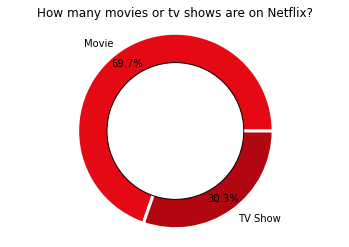

In [82]:
colors = ['#E50914','#B00710']
explode = (0,0)
plt.pie(value, colors=colors, labels=label, explode=explode, autopct='%1.1f%%',
 pctdistance =0.85,
 shadow=False,
 wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},)
centre_circle = plt.Circle((0,0),0.70,color='black', fc='white',linewidth=1.00)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title('How many movies or tv shows are on Netflix?')
plt.show()

In [80]:
# Overall, Netflix has a huge list of content with 6126 movies and 2664 tv shows.

## Task #2: What is the most popular release year for movies on Netflix?

In [27]:
df.head(2)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,new_date_added,year_added,month_added,count
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021,9,1
1,s2,TV Show,Blood & Water,NA,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2021,9,1


In [28]:
movie_df = df[df['type']=='Movie']

In [29]:
released_year_summed = movie_df.groupby(['release_year']).sum().reset_index()[['release_year','count']]

In [30]:
released_year_summed.sort_values(by='count',ascending=False)

,release_year,count
69,2018,767
68,2017,765
67,2016,658
70,2019,633
71,2020,517
...,...,...
12,1961,1
14,1963,1
17,1966,1
5,1947,1


In [31]:
# The most popular release year for movies on Netflix is 2018. Post Pandemic, a lot of movies were delayed which explains the 
# decrease in movies for 2020 and 2021.

## Data Visualization (2D Line Graph)

In [32]:
years = released_year_summed['release_year']
count = released_year_summed['count']

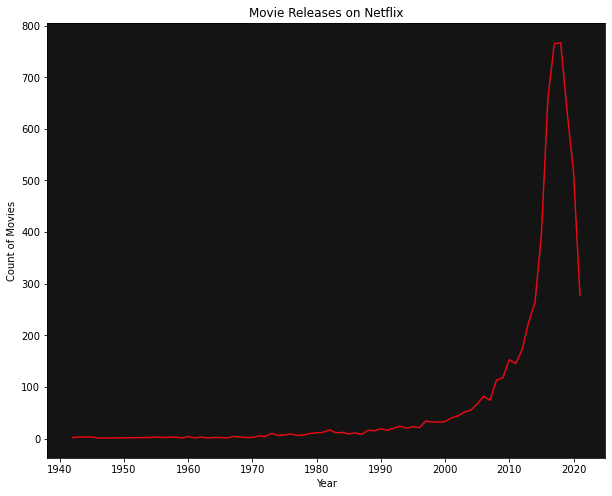

In [34]:
plt.figure(figsize=(10,8))
plt.plot(years, count, color='#E50914')
ax = plt.subplot(1,1,1)
plt.title('Movie Releases on Netflix')
plt.xlabel('Year')
plt.ylabel('Count of Movies')
plt.rcParams['axes.facecolor'] = '#141414'
plt.grid(False)
plt.show()

## Task #3: What year did netflix add the most content to its platform?

In [35]:
df.head(2)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,new_date_added,year_added,month_added,count
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021,9,1
1,s2,TV Show,Blood & Water,NA,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2021,9,1


In [37]:
top_year = df.groupby(['year_added']).sum().reset_index()[['year_added','count']]
top_year.sort_values(by='count',ascending=False)

,year_added,count
11,2019,2016
12,2020,1879
10,2018,1648
13,2021,1498
9,2017,1185
8,2016,426
7,2015,82
6,2014,24
3,2011,13
5,2013,11


In [38]:
#The year with the most content on Netflix is 2019.

## Data Visualization (Bar Graph)

In [39]:
year_added = top_year['year_added']
most_content = top_year['count']

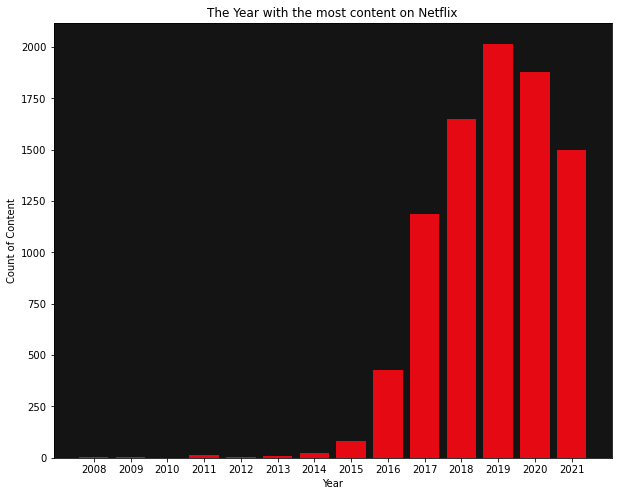

In [40]:
plt.figure(figsize=(10,8))
plt.bar(year_added, most_content, color='#E50914')
ax = plt.subplot(1,1,1)
plt.xticks(range(2008,2022))
plt.title('The Year with the most content on Netflix')
plt.xlabel('Year')
plt.ylabel('Count of Content')
plt.rcParams['axes.facecolor'] = '#141414'
plt.grid(False)
plt.show()

## Task #4: Independent of Year, what is the most popular month to add new content?

In [41]:
df.head(2)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,new_date_added,year_added,month_added,count
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021,9,1
1,s2,TV Show,Blood & Water,NA,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2021,9,1


In [42]:
df['count']=1
month_popular = df.groupby(['month_added']).sum().reset_index()[['month_added','count']]
month_popular.sort_values(by='count',ascending=False)

,month_added,count
6,7,827
11,12,812
8,9,769
3,4,763
9,10,760
7,8,754
2,3,741
0,1,737
5,6,728
10,11,705


In [43]:
#July is the best month to add content on Netflix. School is out of session in July so more people will be watching Netflix.
#Same thing applies in December.

## Data Visualization (Bar Graph)

In [44]:
month_added = month_popular['month_added']
month_content = month_popular['count']

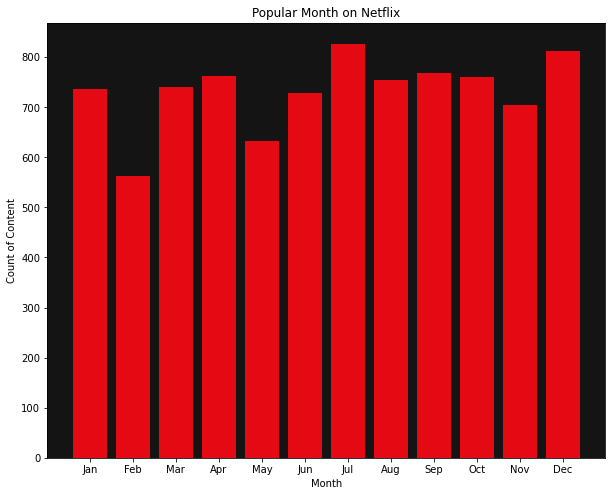

In [45]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plt.bar(month_added, month_content, color='#E50914')
ax.set_title('Popular Month on Netflix')
ax.set_xlabel('Month')
ax.set_ylabel('Count of Content')
x = range(1,13)
labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.xticks(x, labels)
plt.grid(False)
plt.rcParams['axes.facecolor'] = '#141414'

plt.show()

## Task#5: What is the movie with the longeset title in the dataset?

In [46]:
df.head(2)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,new_date_added,year_added,month_added,count
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021,9,1
1,s2,TV Show,Blood & Water,NA,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2021,9,1


In [47]:
movie_df = df[df['type']=='Movie']

In [48]:
movie_df['title_length'] = [len(title) for title in movie_df['title']]

C:\Users\User\AppData\Local\Temp\ipykernel_3924\625075229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['title_length'] = [len(title) for title in movie_df['title']]


In [49]:
movie_df.head(2)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,new_date_added,year_added,month_added,count,title_length
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021,9,1,20
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021-09-24,2021,9,1,32


In [50]:
longest_title = movie_df.sort_values(by='title_length',ascending=False)
longest_title.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,new_date_added,year_added,month_added,count,title_length
5164,s5165,Movie,Jim & Andy: The Great Beyond - Featuring a Ver...,Chris Smith,Jim Carrey,"Canada, United States",2017,TV-MA,94 min,Documentaries,Through the lens of his stunningly immersive p...,2017-11-17,2017,11,1,104
3240,s3241,Movie,Mike Birbiglia: What I Should Have Said Was No...,NA,Mike Birbiglia,United States,2008,TV-MA,56 min,Stand-Up Comedy,Mike Birbiglia performs in this live concert s...,2019-11-22,2019,11,1,88
8462,s8463,Movie,The Power of Grayskull: The Definitive History...,"Randall Lobb, Robert McCallum",NA,"Canada, United States",2017,TV-14,96 min,Documentaries,This colorful documentary explores the origins...,2018-08-24,2018,8,1,88
4851,s4852,Movie,Steve Martin and Martin Short: An Evening You ...,Marcus Raboy,"Steve Martin, Martin Short",United States,2018,TV-14,74 min,Stand-Up Comedy,Longtime pals and showbiz icons Steve Martin a...,2018-05-25,2018,5,1,83
3479,s3480,Movie,Cultivating the Seas: History and Future of th...,Mana Yasuda,NA,United States,2019,TV-PG,45 min,"Documentaries, International Movies",An in-depth look at the full-cycle breeding pr...,2019-09-28,2019,9,1,79


### The longest movie title in the dataset

In [51]:
longest_title.iloc[0]['title']

'Jim & Andy: The Great Beyond - Featuring a Very Special, Contractually Obligated Mention of Tony Clifton'

## Task #6:Which actor/actress shows up most frequently in the netflix database?

In [52]:
df.head(2)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,new_date_added,year_added,month_added,count
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021,9,1
1,s2,TV Show,Blood & Water,NA,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2021,9,1


In [53]:
title_and_cast_df = df[['title','cast']]

In [54]:
title_and_cast_df.head(4)

,title,cast
0,Dick Johnson Is Dead,NA
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban..."
2,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi..."
3,Jailbirds New Orleans,NA


In [55]:
title_and_cast_df = title_and_cast_df[title_and_cast_df.cast != 'NA']

In [56]:
title_and_cast_df.head(5)

,title,cast
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban..."
2,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi..."
4,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K..."
5,Midnight Mass,"Kate Siegel, Zach Gilford, Hamish Linklater, H..."
6,My Little Pony: A New Generation,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ..."


In [57]:
cast_names_counter = {}

for index, row in title_and_cast_df.iterrows():
    movie_cast = row['cast']
    movie_cast_split = movie_cast.split(',')
    movie_cast_stripped = [name.strip().lower() for name in movie_cast_split]
    for name in movie_cast_stripped:
        cast_names_counter[name] = cast_names_counter.get(name, 0) + 1
        
popular_actors = dict(sorted(cast_names_counter.items(), key=lambda item: item[1], reverse=True))
top_10 = dict(Counter(popular_actors).most_common(10))
top_10

{'anupam kher': 43,
 'shah rukh khan': 35,
 'julie tejwani': 33,
 'naseeruddin shah': 32,
 'takahiro sakurai': 32,
 'rupa bhimani': 31,
 'akshay kumar': 30,
 'om puri': 30,
 'yuki kaji': 29,
 'amitabh bachchan': 28}

In [58]:
# All of these actors are not American. They are a list of Actors that appear in Hindi films.

## Data Visualization (Horizontal Bar Graph)

In [59]:
actor_names = list(top_10.keys())
movie_count = list(top_10.values())

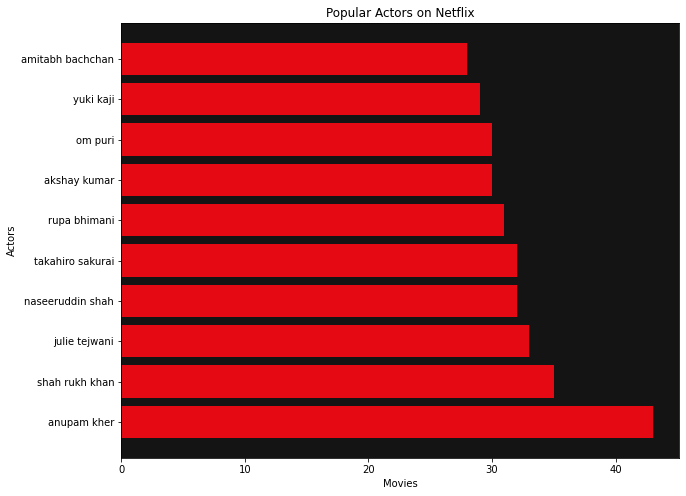

In [60]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plt.barh(actor_names, movie_count, color='#E50914')
ax.set_title('Popular Actors on Netflix')
ax.set_xlabel('Movies')
ax.set_ylabel('Actors')
plt.grid(False)
plt.rcParams['axes.facecolor'] = '#141414'

plt.show()